DS10 networkx を利用した中心性の計算例

In [1]:
# ライブラリをインポート
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 無向グラフの定義 (ノードとエッジをリストで定義して作成) 
graph = [
    (1, 2, 3), # ノード1とノード2の間に重み3のエッジを作成
    (1, 4, 2),
    (2, 3, 2),
    (3, 4, 1),
    (3, 5, 1),
    (4, 5, 1),
]
G = nx.Graph()
G.add_weighted_edges_from(graph)

# ノードの座標の定義
pos = {1: (0, 0), 2: (3, 0), 3: (2, 2), 4: (1, 2), 5: (1.5, 1)}

Graph with 5 nodes and 6 edges


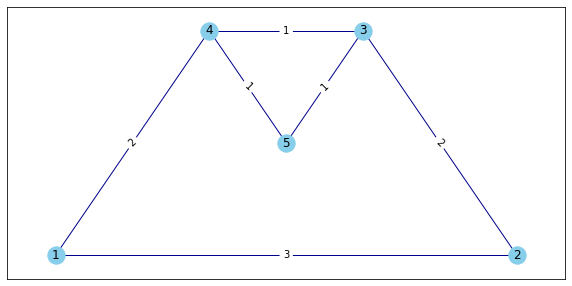

In [3]:
# グラフを表示
print(G)
plt.figure(figsize=(10, 5))
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx(G, pos, with_labels=True, 
                 edge_color='darkblue', node_color='skyblue')
plt.show()

In [4]:
print('# 次数中心性 (ノードに接続するエッジ数/(ノード数-1))')
print(nx.degree_centrality(G))
print('# 近接中心性 (他ノードへの距離の平均)')
print(nx.closeness_centrality(G))
print('# 媒介中心性 (他ノード間の最短経路のうち着目ノードを通過する割合)')
print(nx.betweenness_centrality(G))
print('# ページランク (被接続数の多いノードから接続されたノードが重要)')
print(nx.pagerank(G))

# 次数中心性 (ノードに接続するエッジ数/(ノード数-1))
{1: 0.5, 2: 0.5, 4: 0.75, 3: 0.75, 5: 0.5}
# 近接中心性 (他ノードへの距離の平均)
{1: 0.6666666666666666, 2: 0.6666666666666666, 4: 0.8, 3: 0.8, 5: 0.6666666666666666}
# 媒介中心性 (他ノード間の最短経路のうち着目ノードを通過する割合)
{1: 0.08333333333333333, 2: 0.08333333333333333, 4: 0.25, 3: 0.25, 5: 0.0}
# ページランク (被接続数の多いノードから接続されたノードが重要)
{1: 0.237949115465471, 2: 0.237949115465471, 4: 0.20375344201111023, 3: 0.20375344201111023, 5: 0.11659488504683771}


Graph with 5 nodes and 4 edges


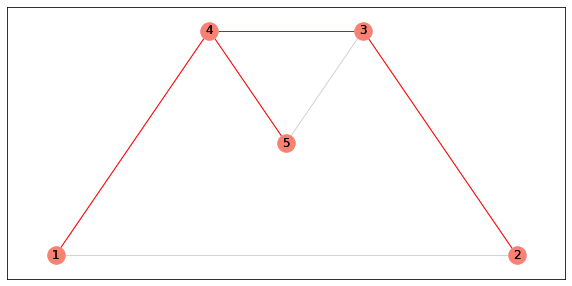

In [5]:
# 最小全域木
MST = nx.minimum_spanning_tree(G)
print(MST)
plt.figure(figsize=(10, 5))
nx.draw_networkx(G, pos, edge_color='lightgray', node_color='lightgray')
nx.draw_networkx(MST, pos, edge_color='red', node_color='salmon')
